In [245]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import wbdata

In [246]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Set seaborn aesthetic parameters to defaults
sns.set()

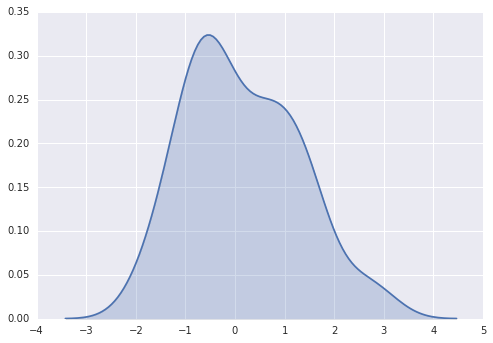

In [256]:
from numpy.random import randn
data = randn(75)
#plt.hist(data)
sns.kdeplot(data, shade=True)

(array([  1.,   0.,   1.,   6.,   5.,  20.,  13.,  17.,  14.,  13.,   5.,
          5.]),
 array([-3.20367516, -2.76467783, -2.3256805 , -1.88668317, -1.44768584,
        -1.0086885 , -0.56969117, -0.13069384,  0.30830349,  0.74730082,
         1.18629816,  1.62529549,  2.06429282]),
 <a list of 12 Patch objects>)

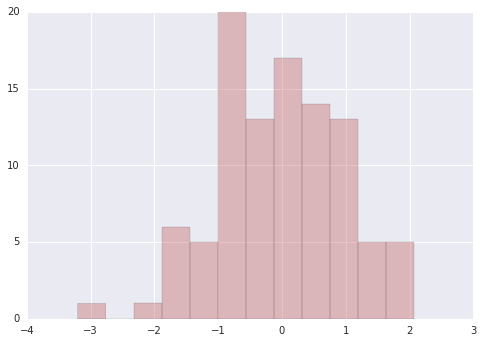

In [252]:
data = randn(100)
plt.hist(data, bins=12, color=sns.desaturate("indianred", .8), alpha=.4)

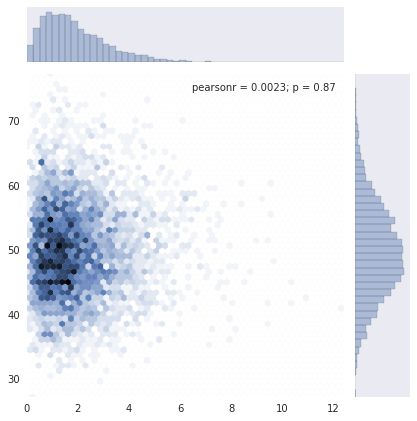

In [254]:
from scipy import stats
x = stats.gamma(2).rvs(5000)
y = stats.gamma(50).rvs(5000)
with sns.axes_style("dark"):
    sns.jointplot(x, y, kind="hex")

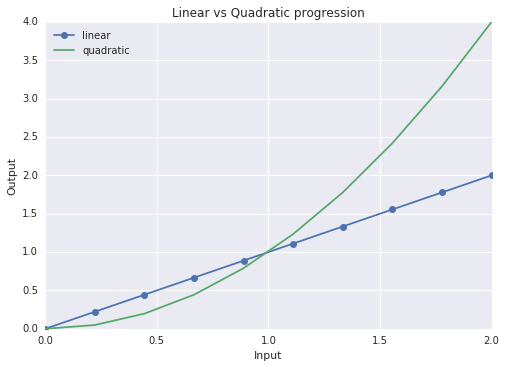

In [13]:
x = np.linspace(0, 2, 10)

plt.plot(x, x, 'o-', label='linear')
plt.plot(x, x ** 2, 'x-', label='quadratic')

plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output');
plt.show()

In [35]:
# 获取数据源
#wbdata.get_source()

In [36]:
#　获取某数据源的指标
#　wbdata.get_indicator(source=3)

In [289]:
# 查找拉美国家的代码
wbdata.search_countries("mexico")
wbdata.search_countries("cuba")
wbdata.search_countries("costa rica")
wbdata.search_countries("dominicana")
wbdata.search_countries("trinidad")
wbdata.search_countries("nicaragua")
wbdata.search_countries("guatemala")
wbdata.search_countries("salvador")
wbdata.search_countries("honduras")
wbdata.search_countries("venezuela")
wbdata.search_countries("ecuador")
wbdata.search_countries("peru")
wbdata.search_countries("bolivia")
wbdata.search_countries("colombia")
wbdata.search_countries("brazil")
wbdata.search_countries("argentina")
wbdata.search_countries("paraguay")
wbdata.search_countries("uruguay")
# 建立拉美国家代码列表，方便一次性查找多个国家的数据
# countries = ["MEX","CUB","CRI","TTO","NIC","GTM","SLV","HND","VEN","ECU","PER","BOL","COL","BRA","ARG","PRY","URY"]

countries = ["VEN","BRA"]
# output 
#  "MEX","CUB","CRI","TTO","NIC","GTM","SLV","HND","VEN","ECU","PER","BOL","COL","BRA","ARG","PRY","URY"
# MEX	Mexico
# CUB	Cuba
# CRI	Costa Rica
# TTO	Trinidad and Tobago
# NIC	Nicaragua
# GTM	Guatemala
# SLV	El Salvador
# HND	Honduras
# VEN	Venezuela, RB
# ECU	Ecuador
# PER	Peru
#  BOL	Bolivia
# COL	Colombia
# BRA	Brazil
# ARG	Argentina
# PRY	Paraguay
# URY	Uruguay

MEX	Mexico
CUB	Cuba
CRI	Costa Rica
TTO	Trinidad and Tobago
NIC	Nicaragua
GTM	Guatemala
SLV	El Salvador
HND	Honduras
VEN	Venezuela, RB
ECU	Ecuador
PER	Peru
BOL	Bolivia
COL	Colombia
BRA	Brazil
ARG	Argentina
PRY	Paraguay
URY	Uruguay


In [290]:
#wbdata.get_data("FP.CPI.TOTL.ZG", country='VEN')

In [291]:
import datetime
data_date = (datetime.datetime(2010, 1, 1), datetime.datetime(2016, 1, 1))

In [292]:
#wbdata.get_data("FP.CPI.TOTL.ZG", country=("VEN","BRA"), data_date=data_date)
# wbdata.get_data("FP.CPI.TOTL.ZG", country=countries)

In [293]:
# 查找相关领域的指标
# 检索通胀率
wbdata.search_indicators("inflation")
# wbdata.search_indicators("gdp percent")

FP.CPI.TOTL.ZG   	Inflation, consumer prices (annual %)
NY.GDP.DEFL.KD.ZG	Inflation, GDP deflator (annual %)


In [294]:
# 检索gdp增长
wbdata.search_indicators("gdp per capita growth")

NV.AGR.PCAP.KD.ZG	Real agricultural GDP per capita growth rate (%)
NY.GDP.PCAP.KD.ZG	GDP per capita growth (annual %)


In [295]:
# 检索出口
wbdata.search_indicators("Exports of goods and services")

BX.GSR.GNFS.CD   	Exports of goods and services (BoP, current US$)
NE.EXP.GNFS.CD   	Exports of goods and services (current US$)
NE.EXP.GNFS.CN   	Exports of goods and services (current LCU)
NE.EXP.GNFS.KD   	Exports of goods and services (constant 2005 US$)
NE.EXP.GNFS.KD.ZG	Exports of goods and services (annual % growth)
NE.EXP.GNFS.KN   	Exports of goods and services (constant LCU)
NE.EXP.GNFS.ZS   	Exports of goods and services (% of GDP)


In [296]:
#  构建包含多个指标的数组
allindicators = {"NE.EXP.GNFS.KD.ZG":"Exports of goods and services","FP.CPI.TOTL.ZG":"Inflation, consumer prices (annual %)","NY.GDP.PCAP.KD.ZG":"gdp per capita growth"}

indicators = {"FP.CPI.TOTL.ZG":"Inflation, consumer prices (annual %)"}

In [297]:
# wbdata.get_incomelevel()
# oec_countries = [i['id'] for i in wbdata.get_country(incomelevel="OEC", display=False)]
# print(oec_countries)

In [298]:
# indicators = {"FP.CPI.TOTL.ZG":"inflation", "NY.GDP.PCAP.PP.KD": "gdppc"}
df = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=True)
# df = wbdata.get_data("FP.CPI.TOTL.ZG", country=("VEN"), data_date=data_date)

In [299]:
df.shape


(12, 1)

In [300]:
# 对获取的拉美国家数据进行统计描述
df.describe()

,"Inflation, consumer prices (annual %)"
count,12.000000
mean,28.210879
std,34.330229
min,5.038317
25%,6.299544
50%,15.048118
75%,31.300455
max,121.738085


In [301]:
df.head()

Inflation, consumer prices (annual %)
country date                                             
Brazil  2015-01-01                               9.027240
        2014-01-01                               6.332092
        2013-01-01                               6.201900
        2012-01-01                               5.401965
        2011-01-01                               6.636199

In [302]:
df.tail()
#allcountries = wbdata.get_country()

Inflation, consumer prices (annual %)
country       date                                             
Venezuela, RB 2014-01-01                              62.168650
              2013-01-01                              40.639428
              2012-01-01                              21.068996
              2011-01-01                              26.090212
              2010-01-01                              28.187465

In [303]:
# allindicators = wbdata.get_indicator()
#c2 = csv.writer(open("allindicators.csv", "wb"))
#c2.writer

In [304]:
#grab indicators above for countires above and load into data frame
# df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

In [305]:
dfu.tail()

Inflation, consumer prices (annual %)              
country                                   Brazil Venezuela, RB
date                                                          
2011-01-01                              6.636199     26.090212
2012-01-01                              5.401965     21.068996
2013-01-01                              6.201900     40.639428
2014-01-01                              6.332092     62.168650
2015-01-01                              9.027240    121.738085

In [306]:
dfu[0:10]

Inflation, consumer prices (annual %)              
country                                   Brazil Venezuela, RB
date                                                          
2010-01-01                              5.038317     28.187465
2011-01-01                              6.636199     26.090212
2012-01-01                              5.401965     21.068996
2013-01-01                              6.201900     40.639428
2014-01-01                              6.332092     62.168650
2015-01-01                              9.027240    121.738085

In [307]:
# a simple matplotlib plot with legend, labels and a title
#dfu[0:10].plot(); 
#plt.legend(loc='best'); 
#plt.title("Inflation"); 
#plt.xlabel('Date'); 
#plt.ylabel('Inflation Rate');

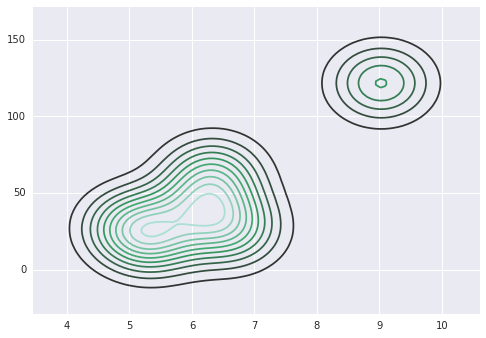

In [308]:
sns.kdeplot(dfu)